In [1]:
import torch
t_one =torch.Tensor([[1,1,1],[2,2,2],[3,3,3]]) 
print(t_one)
import sklearn

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]])


In [42]:
import torch.nn as nn
model=nn.Linear(1,1)
for i in model.named_parameters():
    print(i)

('weight', Parameter containing:
tensor([[-0.6081]], requires_grad=True))
('bias', Parameter containing:
tensor([0.6983], requires_grad=True))


In [6]:
import torch.nn as nn

model = nn.Linear(1,1)

for i in model.named_parameters():
    print(i)

('weight', Parameter containing:
tensor([[0.0696]], requires_grad=True))
('bias', Parameter containing:
tensor([0.8162], requires_grad=True))


In [ ]:
import inspect
import sklearn

models = [sklearn.linear_model.LinearRegression]
for m in models:
    hyperparams = inspect.signature(m.__init__)
    print(hyperparams)
 

In [ ]:
t_two =torch.Tensor([[1,1,1],[2,2,2],[3,3,3]]) 
print(t_two)

In [ ]:
dot_prod=torch.mm(t_one,t_two)
print(dot_prod)

In [166]:
import torch
#forword pass
w=torch.tensor(1.0,requires_grad=True)
x=torch.tensor(1.0)
y=torch.tensor(2.0)
#forword pass ip op 
yy=w*x
loss=(y-yy)**2
#backward pass going back from op and apply grad for ip
loss.backward()
print(w.grad)


tensor(-2.)


In [167]:
# import torch.nn as nn

# #model = nn.Linear(1,1)
# for j in model.named_parameters():
#     if j.requires_grad:
#         #print(j)   
#         print(j)

In [52]:
import numpy as np 
import pandas as pd 
data_hound = pd.read_csv("hound.txt", delimiter='\t', header=None)
data_hound.columns = ["Review_text", "Review_class"]

data_sample = pd.read_csv("sample.txt", delimiter='\t', header=None)
data_sample.columns = ["Review_text", "Review_class"]

# data_yelp = pd.read_csv("yelp_labelled.txt", delimiter='\t', header=None)
# data_yelp.columns = ["Review_text", "Review_class"]

data = pd.concat([data_hound,data_sample])
data_hound.loc[1,["Review_text"]]
import re
import nltk

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
def clean_text(df):
    all_reviews = list()
    lines = df["Review_text"].values.tolist()
    for text in lines:
        text = text.lower()
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        PS = PorterStemmer()
#         words = [w for w in words if not w in stop_words]
        words = [PS.stem(w) for w in words if not w in stop_words]
        words = ' '.join(words)
        all_reviews.append(words)
    return all_reviews

all_reviews = clean_text(data)
#all_reviews[0:20]
stopwords.words("english")

from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(min_df=3)   
X = CV.fit_transform(all_reviews).toarray()
y = data.loc[:,["Review_class"]]
print(type(X))
print(type(y))
y=y.dropna()
print(y)
print(y.shape)
X=torch.tensor(X,dtype=torch.float32)
y=y.to_numpy()#we cant chge directly from data frame  to tensor so 1st np array  then  torch
y=torch.tensor(y,dtype=torch.float32)
print(y.shape)
print(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/local/ZOHOCORP/abdul-pt6532/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
     Review_class
0             0.0
1             1.0
2             1.0
3             0.0
4             1.0
..            ...
991           0.0
992           0.0
993           0.0
994           0.0
995           0.0

[1996 rows x 1 columns]
(1996, 1)
torch.Size([1996, 1])
tensor([[0.],
        [1.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]])


In [ ]:
#stochastic .graddescent in pytorch optimizers


import torch
from torch.nn import MSELoss, Parameter

# The data function is: y = x + 10
x_train = torch.tensor([1, 2, 3, 4])
y_train = torch.tensor([11.0, 12.0, 13.0, 14.0])#, dtype=torch.float

# Simple Linear Regression: a + bx
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

# If we use nn.Module to create a model, it will model.parameters()
model = [Parameter(a), Parameter(b)]

criterion = MSELoss()
# optimizer = torch.optim.SGD(model, lr=0.1)
optimizer = torch.optim.Adam(model, lr=0.1)

for epoch in range(10):#500
    # Remove the grad computed in the last step
    optimizer.zero_grad()
    # Run a + bx
    y_predicted = model[0] + model[1] * x_train
    print(x_train, y_train, y_predicted)
    loss = criterion(y_predicted, y_train)
    loss.backward()
    print("los is ",loss)
    optimizer.step()
    #print(model[0].grad)
    #rint(model[1].grad)
 
    
    
    
    
    

In [ ]:
import torch.nn as nn


model = nn.Linear(1,1)
for i,j in model.named_parameters():
        if j.requires_grad:
            print(j )

In [10]:
import torch.nn as nn

#model = nn.Linear(1,1)
for i,j in model.named_parameters():
        print(j)   
    

Parameter containing:
tensor([0.8162], requires_grad=True)
Parameter containing:
tensor([0.8162], requires_grad=True)


In [11]:
for i in model.named_parameters():
    print(i)



('weight', Parameter containing:
tensor([[0.0696]], requires_grad=True))
('bias', Parameter containing:
tensor([0.8162], requires_grad=True))


In [53]:
import torch
from torch.nn import MSELoss, Parameter

# The data function is: y = x + 10
x_train = torch.tensor(t1)
y_train = torch.tensor(t2, dtype=torch.float)

# Simple Linear Regression: a + bx
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
#print("h",a)
#print("h",b)
# If we use nn.Module to create a model, it will model.parameters()
model = [Parameter(a), Parameter(b)]
print(model)
criterion = MSELoss()
# optimizer = torch.optim.SGD(model, lr=0.1)
optimizer = torch.optim.Adam(model, lr=0.01)

for epoch in range(500):#500
    # Remove the grad computed in the last step
    optimizer.zero_grad()
    # Run a + bx
    y_predicted = model[0] + model[1] * x_train
     #print(x_train, y_train)
    print( y_train)
    print(y_predicted)
    loss = criterion(y_predicted, y_train)
    loss.backward()
    print()
    print("los is ",loss)
    print()
    optimizer.step()
   

#print(model[0].grad)
       # print(model[1].grad)
 
    

[Parameter containing:
tensor([-0.0064], requires_grad=True), Parameter containing:
tensor([-0.8454], requires_grad=True)]
tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[-0.8518, -0.0064, -0.8518, -0.8518, -0.8518, -0.8518, -0.8518, -0.8518,
         -0.8518, -0.8518, -0.8518, -0.0064]], grad_fn=<AddBackward0>)

los is  tensor(1.6746, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[-0.8318,  0.0036, -0.8318, -0.8318, -0.8318, -0.8318, -0.8318, -0.8318,
         -0.8318, -0.8318, -0.8318,  0.0036]], grad_fn=<AddBackward0>)

los is  tensor(1.6299, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[-0.8118,  0.0136, -0.8118, -0.8118, -0.8118, -0.8118, -0.8118, -0.8118,
         -0.8118, -0.8118, -0.8118,  0.0136]], grad_fn=<AddBackward0>)

los is  tensor(1.5859, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[-0.7918,  0.0236,

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[0.4293, 0.6996, 0.4293, 0.4293, 0.4293, 0.4293, 0.4293, 0.4293, 0.4293,
         0.4293, 0.4293, 0.6996]], grad_fn=<AddBackward0>)

los is  tensor(0.2158, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[0.4293, 0.7002, 0.4293, 0.4293, 0.4293, 0.4293, 0.4293, 0.4293, 0.4293,
         0.4293, 0.4293, 0.7002]], grad_fn=<AddBackward0>)

los is  tensor(0.2157, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[0.4292, 0.7008, 0.4292, 0.4292, 0.4292, 0.4292, 0.4292, 0.4292, 0.4292,
         0.4292, 0.4292, 0.7008]], grad_fn=<AddBackward0>)

los is  tensor(0.2156, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[0.4291, 0.7014, 0.4291, 0.4291, 0.4291, 0.4291, 0.4291, 0.4291, 0.4291,
         0.4291, 0.4291, 0.7014]], grad_fn=<AddBackward0>)

los is  tensor(0.2156, grad_fn=<MseLossBackw

tensor([[0.4169, 0.8223, 0.4169, 0.4169, 0.4169, 0.4169, 0.4169, 0.4169, 0.4169,
         0.4169, 0.4169, 0.8223]], grad_fn=<AddBackward0>)

los is  tensor(0.2055, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[0.4169, 0.8228, 0.4169, 0.4169, 0.4169, 0.4169, 0.4169, 0.4169, 0.4169,
         0.4169, 0.4169, 0.8228]], grad_fn=<AddBackward0>)

los is  tensor(0.2055, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[0.4168, 0.8234, 0.4168, 0.4168, 0.4168, 0.4168, 0.4168, 0.4168, 0.4168,
         0.4168, 0.4168, 0.8234]], grad_fn=<AddBackward0>)

los is  tensor(0.2054, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.]])
tensor([[0.4168, 0.8240, 0.4168, 0.4168, 0.4168, 0.4168, 0.4168, 0.4168, 0.4168,
         0.4168, 0.4168, 0.8240]], grad_fn=<AddBackward0>)

los is  tensor(0.2054, grad_fn=<MseLossBackward0>)

tensor([[0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.

In [1]:
# SGD: Stochastic Gradient Descent
# Useful links
# https://ruder.io/optimizing-gradient-descent/
# https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

# STEPS
# 1. Compute Loss
# 2. Compute Partial Derivatives
# 3. Update the Parameters
# 4. Repeat 1-3 until convergence


import torch
from torch.nn import MSELoss, Parameter

# The data function is: y = x + 10
x_train = torch.tensor([1, 2, 3, 4])
y_train = torch.tensor([11, 12, 13, 14], dtype=torch.float)

# Simple Linear Regression: a + bx
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

# If we use nn.Module to create a model, it will model.parameters()
model = [Parameter(a), Parameter(b)]

criterion = MSELoss()
# optimizer = torch.optim.SGD(model, lr=0.1)
optimizer = torch.optim.Adam(model, lr=0.1)

for epoch in range(500):
    # Remove the grad computed in the last step
    optimizer.zero_grad()
    # Run a + bx
    #y_predicted = model[0] + model[1] * x_train
    y_predicted =model(x_train)
    if epoch % 10 == 0:
        print(x_train, y_train, y_predicted)
        loss = criterion(y_predicted, y_train)
        loss.backward()
        print(loss)
    optimizer.step()
#     print(model[0].grad)
#     print(model[1].grad)
  
   
    # To get the model hyperparameters before you instantiate the class.

  

TypeError: 'list' object is not callable

In [ ]:
import inspect
import sklearn
a = sklearn.ensemble.RandomForestRegressor
models = [sklearn.ensemble.RandomForestRegressor, sklearn.linear_model.LinearRegression]

for m in models:
    hyperparams = 
    #inspect.getargspec(m.__init__).args
    print(hyperparams) # Do something with them here


In [ ]:
import inspect
import sklearn

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestClassifier()
params = reg.get_params()
# do something...
reg.set_params(params)
reg.fit(X,  y)

In [ ]:
import inspect
import sklearn
get_params(deep=True)

In [ ]:
# To get the model hyperparameters before you instantiate the class
import inspect
import sklearn

models = [sklearn.linear_model.LinearRegression]
for m in models:
    hyperparams = inspect.signature(m.__init__)
    print(hyperparams)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

SVR._get_param_names()


In [169]:
# 12*1  1*12 =1*1 ///////////////////////////////////////////////
from sklearn.feature_extraction.text import CountVectorizer
document1 = 'Dog hates a cat It loves to go out and play'
document2 = 'Cat loves to play with a ball'

# converting sentences to lower case
document1 = document1.lower()
document2 = document2.lower()

# Intialize BoWs
count_vect = CountVectorizer()
# fit the corpus to CountVectorizer
count_vect.fit([document1, document2])

#--------print("feature names ", count_vect.get_feature_names())

# bag of word representation of document1
bow1 = count_vect.transform([document1])
t1=bow1.toarray()
print("Representation  ", t1)

# bag of word representation of document2
bow2 = count_vect.transform([document2])
t2=bow2.toarray()
print("Representation  ", t2)

# Output:
# feature names  ['and', 'ball', 'cat', 'dog', 'go', 'hates', 'it', 'loves', 'out', 'play', 'to', 'with']

# Representation of document1:  [[1 0 1 1 1 1 1 1 1 1 1 0]]
# Representation of document2:  [[0 1 1 0 0 0 0 1 0 1 1 1]]












import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
# Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
X = torch.tensor(t1, dtype=torch.float32)
Y = torch.tensor(t2, dtype=torch.float32)
print(Y.shape)
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([4], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch


# we can call this mod2el with samples X
model = nn.Linear(1,12)


# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X_test)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print("hi")
        print('epoch ', epoch+1,' loss = ', l)
# for i,j in model.named_parameters():
#     print(i,j)
#-------------------------------------------------------important
# print(model.weight)
# print(model.bias)
print()
print(f"Prediction after training: {model(X_test)}")


Representation   [[1 0 1 1 1 1 1 1 1 1 1 0]]
Representation   [[0 1 1 0 0 0 0 1 0 1 1 1]]
torch.Size([1, 12])
#samples: 1, #features: 12
hi
epoch  1  loss =  tensor(8.6063, grad_fn=<MseLossBackward0>)
hi
epoch  11  loss =  tensor(4.8435, grad_fn=<MseLossBackward0>)
hi
epoch  21  loss =  tensor(2.7259, grad_fn=<MseLossBackward0>)
hi
epoch  31  loss =  tensor(1.5341, grad_fn=<MseLossBackward0>)
hi
epoch  41  loss =  tensor(0.8634, grad_fn=<MseLossBackward0>)
hi
epoch  51  loss =  tensor(0.4859, grad_fn=<MseLossBackward0>)
hi
epoch  61  loss =  tensor(0.2735, grad_fn=<MseLossBackward0>)
hi
epoch  71  loss =  tensor(0.1539, grad_fn=<MseLossBackward0>)
hi
epoch  81  loss =  tensor(0.0866, grad_fn=<MseLossBackward0>)
hi
epoch  91  loss =  tensor(0.0487, grad_fn=<MseLossBackward0>)
Parameter containing:
tensor([[-0.0041],
        [ 0.1021],
        [ 0.3643],
        [-0.2482],
        [ 0.1678],
        [-0.0734],
        [ 0.0953],
        [ 0.0007],
        [ 0.0886],
        [ 0.0906],
  

torch.Size([100, 1])
torch.Size([100, 1])


NameError: name 'predicted' is not defined

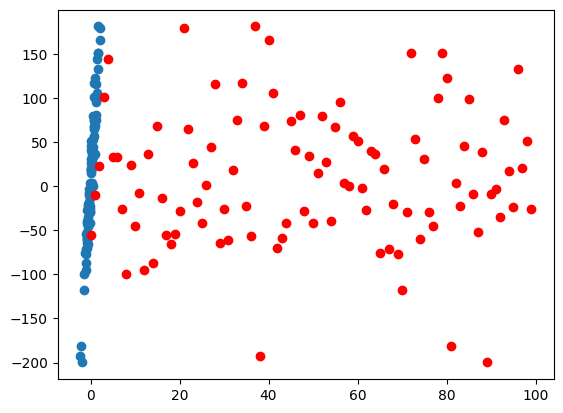

In [3]:
import torch.nn as nn
import numpy as np

from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import pyplot
x_numpy,y_numpy =datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
x=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(x_numpy.astype(np.float32))
# print(x_numpy,y_numpy)
# x=torch.tensor(x_numpy.astype(np.float32))
# y=torch.tensor(x_numpy.astype(np.float32))
print(y.shape)
y=y.view(y.shape[0],1)
n_samples,n_features=x_numpy.shape
print(y.shape)
model=nn.Linear(n_features,1)
loss=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),0.01)
#loop
for i in range(100):
    #forword and back word and updateff
    y_predicted=model(x)
    l=loss(y,y_predicted)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
#     print(f'{l:.3predicted=model(x).detach().numpy()
plt.plot(y_numpy,'ro')
plt.scatter(x_numpy,y_numpy)


plt.plot(x_numpy,predicted,'b')
plt.show()



# logistic regression 


In [78]:
#about (-1)shape
import numpy 
a = numpy.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(a.shape[1])
#print(a)
# print(a[1, 2:4])
# k=a.reshape(-1,-1)
# print(k.shape)
# print(k)

4


In [9]:
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88])
print(X.shape)
X.reshape(12,1)

(12,)


array([[3.78],
       [2.44],
       [2.09],
       [0.14],
       [1.72],
       [1.65],
       [4.92],
       [4.37],
       [4.96],
       [4.52],
       [3.69],
       [5.88]])

In [5]:
import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([2.09]).reshape(-1,1))

print(predicted)


[0]


In [4]:
import torch
import torch.nn as nn
import numpy as np
torch.nn.Module
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
print(y_test.shape)
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)
print(y_test.shape)
model =LogisticRegression()
# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
         super(Model, self).__init__()

         self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')


torch.Size([114])
torch.Size([114, 1])
epoch: 10, loss = 0.4597
epoch: 20, loss = 0.3953
epoch: 30, loss = 0.3514
epoch: 40, loss = 0.3195
epoch: 50, loss = 0.2951
epoch: 60, loss = 0.2758
epoch: 70, loss = 0.2600
epoch: 80, loss = 0.2468
epoch: 90, loss = 0.2356
epoch: 100, loss = 0.2259
accuracy: 0.9035
